# Decision Trees and Ensemble Learning

## Prepare data for credit risk scoring project

In [1]:
# Credit risk scoring project
# Dataset: https://github.com/gastonstat/CreditScoring

# imports:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Data cleaning and preparation part:
# -- Downloading the dataset
# -- Re-encoding the categorical variables
# -- Doing the train/validation/test split

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

df = pd.read_csv(data)
df.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()
# for convenience - to make col names better usable in dot notation 

In [4]:
# next problem - data in df are encoded as 1, 2, 3 - for example status variable:
df.status # using dot notation is super cool BTW )))

0       1
1       1
2       2
3       1
4       1
       ..
4450    2
4451    1
4452    2
4453    1
4454    1
Name: status, Length: 4455, dtype: int64

In [5]:
df.status.describe()

count    4455.000000
mean        1.281257
std         0.450162
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: status, dtype: float64

In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
# so we need to use map functions to map this 1 2 3 coding into normal readable values:

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [8]:
# and do so for all categorical columns

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)


In [9]:
df.head() # looks much better now! At least human readable....

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
# third problem with dataset - for R language they replaced NaN with many nines:
# max	48.0	72.0	68.0	180.0	99999999.0	99999999.0	99999999.0	5000.0	11140.
# and mean statistics looks skewd heavily:
# mean	8.0	46.0	37.0	56.0	763317.0	1060341.0	404382.0	1039.0	1463.0
# mean income here is 763317.0 USD for example - VERY AMBITIOUS ))

df.describe().round() # this will take now ONLY NUMERICAL FEATURES for desc stats - cool))

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
# replace 99999999 for NaN

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [12]:
df.describe().round() # mean income now 131, not 763317 as before...

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
# finally we can remove 1 row with unknown status - as it is our label and it is useleless -
# we cannot train model if we don't know the label ))

df = df[df.status != 'unk'].reset_index(drop=True)

In [14]:
# Next step to do is the train/validation/test split

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [15]:
len(df_full_train), len(df_test) # (3563, 891)

(3563, 891)

In [16]:
len(df_train), len(df_val)  # (2672, 891)

(2672, 891)

In [17]:
# reset index in our splits

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
# now convert our label to 0 or 1
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [19]:
# and finally remove the label

del df_train['status']
del df_val['status']
del df_test['status']

In [20]:
# data prep part done ))

## Train the model

In [21]:
# Decision trees
# -- How a decision tree looks like
# -- Training a decision tree
# -- Overfitting
# -- Controlling the size of a tree

# we are building a classifier model - default / not default:
from sklearn.tree import DecisionTreeClassifier

# we use many categorical features, thus one-hot encoding is needed:
from sklearn.feature_extraction import DictVectorizer

# then we need baked-in SKL metrics so we save time by not hand-coding them:
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

train_dicts = df_train.fillna(0).to_dict(orient='records')
# train_dicts[:5] # quick check - all looks good!
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts) # used DictVectorizer for 1-hot encoding of our training dataset


In [22]:
dv.get_feature_names_out() # after 1-hot encoding how our features look like...
# old version get_feature_names is deprecated, new version is dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [23]:
for name, value in zip(dv.get_feature_names_out(), np.round(X_train[0]).astype(int)):
    print(name, value) # prints our first row nicely using python zip() function - manual check - looks good!

age 36
amount 1000
assets 10000
debt 0
expenses 75
home=ignore 0
home=other 0
home=owner 1
home=parents 0
home=private 0
home=rent 0
home=unk 0
income 0
job=fixed 0
job=freelance 1
job=others 0
job=partime 0
job=unk 0
marital=divorced 0
marital=married 1
marital=separated 0
marital=single 0
marital=unk 0
marital=widow 0
price 1400
records=no 1
records=yes 0
seniority 10
time 36


In [24]:
# train the decision tree:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) # NB - max_depth 	None

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
# and validate it:

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts) # use only transform in validation dataset
y_pred = dt.predict_proba(X_val)[:, 1] # better use dt.predict...
# y_pred

In [26]:
roc_auc_score(y_val, y_pred) # 0.6585121455038628 - roc auc is not impressive....

0.6634193892131458

In [27]:
# if we go my way:
y_pred = dt.predict(X_val)
roc_auc_score(y_val, y_pred) # we get exactly same result with less typing...

0.6634193892131458

In [28]:
# on training dataset roc auc score is much better
y_pred = dt.predict(X_train)
roc_auc_score(y_pred, y_train) 
# 1.0 - fantastic result - we overfit it to train dataset?
# our decision tree memorized all data ))

1.0

In [29]:
# we have to restrict the length of decision tree - to limit its memorization capacity

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train) 
# see max_depth 	3 in parameters - click on black triangle

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

# stats are much better now and more consistent
# train: 0.7761016984958594
# val: 0.7389079944782155

train: 0.7761016984958594
val: 0.7389079944782155


In [31]:
# or doing it my way - now it looks different/low:
y_pred = dt.predict(X_train)
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict(X_val)
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.6855388428820911
val: 0.6398246591266862


In [32]:
# lets limit depth a bit less - 
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train) 

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

# depth of the tree is a hyperparameter
# depth = 4 looks better again and still consistent
# train: 0.8164293560926146
# val: 0.7612827250490422

train: 0.8164293560926146
val: 0.7612827250490422


In [33]:
# now how to find what the tree actually learned - how decisions are made:
from sklearn.tree import export_text
# and get weight coefficients for our decisions
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   |   |--- class: 0
|   |   |--- income >  103.50
|   |   |   |--- expenses <= 89.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  89.00
|   |   |   |   |--- class: 1
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   | 

## Decision trees parameter tuning

In [34]:
# Decision trees (hyper)parameter tuning
# selecting max_depth
# selecting min_samples_leaf

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

# we improved the score to 5 -> 0.767 from our recent best guess of 4 -> 0.761

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.756
  10 -> 0.694
  15 -> 0.666
  20 -> 0.656
None -> 0.653


In [35]:
# lets print our tree for depth = 5
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train) 
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- class: 0
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- assets <= 4500.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  4500.00
|   |   |   |   |--- class: 0
|   |   |--- income >  103.50
|   |   |   |--- expenses <= 89.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  89.00
|   |   |   |   |--- class: 1
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   | 

In [36]:
# argument - tree with depth 4 was easier to read with roughly similar roc auc score
# or more precise - tree depth 4, 5 or 6 is good enough and we may calculate a 
# second hyperparameter - min samples leaf - for each of these tree depths:
# (min samples leaf  - min size of the group or samples required to be at a leaf node for decision tree training for each parameter)

scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))


In [37]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [38]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.744
5                 0.761  0.768  0.763
10                0.761  0.762  0.778
15                0.764  0.772  0.786
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

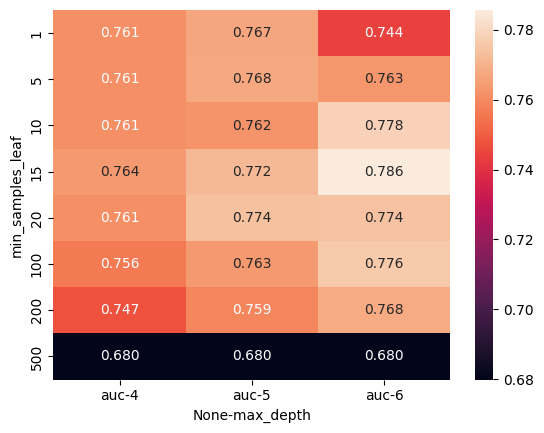

In [39]:
# optimum for us is depth = 6 and min leaf = 15 -> then we get highest score of 0.785
# to make it easier to see we can use a heatmap:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [40]:
# lets use our optimal hyperparams to train the model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
# and print its final version:

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- amount <= 525.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amount >  525.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

## Ensembles and random forest

In [42]:
# Ensembles and random forest
# Board of experts
# Ensembling models
# Random forest - ensembling decision trees
# Tuning random forest

from sklearn.ensemble import RandomForestClassifier


In [43]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
y_pred = rf.predict(X_val)
roc_auc_score(y_val, y_pred)
# if I do it my way - only using predict - then roc auc score is 0.65
# Hyperparameters 
# n_estimators 10, 
# max_depth None, 
# max_leaf_nodes None

0.6504353248892011

In [45]:
# if I do it like in course:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc # much better - 0.7876292654573636

0.7618760746893998

In [46]:
# and we can play with hyperparameter number of trees / n_estimators
from tqdm.auto import tqdm
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

# scores

  0%|          | 0/20 [00:00<?, ?it/s]

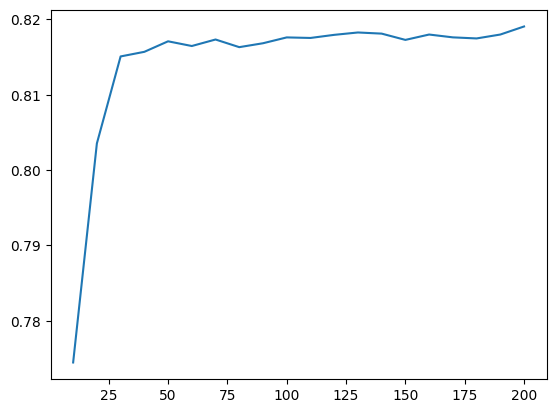

In [47]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc) 
# starting from 40 trees in ensemble results are very close to max 